# Numpy Overview

Adapted from a python introdduction by [Volodymyr Kuleshov](http://web.stanford.edu/~kuleshov/) and [Isaac Caswell](https://symsys.stanford.edu/viewing/symsysaffiliate/21335) from the `CS231n` Python tutorial by Justin Johnson (http://cs231n.github.io/python-numpy-tutorial/).

## Numpy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find this [tutorial](http://wiki.scipy.org/NumPy_for_Matlab_Users) useful to get started with Numpy.

To use Numpy, we first need to import the `numpy` package:

In [86]:
import numpy as np

### Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The shape of an array is a tuple of integers giving the size of the array along each dimension. 

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [87]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print (type(a), a.shape, a[0], a[1], a[2])
a[0] = 5                 # Change an element of the array
print (a)                

<class 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]


In [91]:
b = np.array([[1,2,3],[4,5,6]])   # Create an array from a list
print (b)

[[1 2 3]
 [4 5 6]]


In [92]:
print (b.shape)                   
print (b[0, 0], b[0, 1], b[1, 0])

(2, 3)
1 2 4


Numpy also provides many functions to create arrays:

In [93]:
a = np.zeros((2,2))  # Create an array of all zeros
print (a)

[[ 0.  0.]
 [ 0.  0.]]


In [94]:
b = np.ones((1,2))   # Create an array of all ones
print (b)

[[ 1.  1.]]


In [95]:
e = np.random.random((2,2)) # Create an array filled with random values
print (e)

[[ 0.93726278  0.76463388]
 [ 0.85036641  0.31850498]]


One of the key features of numpy is that you operate on large array of numbers without having to loop through each one.  For example, if we want to do some arithmetic on a million numbers, it takes much longer go through all the overhead of fetching each one than it does to process the whole block as a numpy array:

In [96]:
import numpy as np
from time import time

start_time = time()
rand_arr = np.random.random((10000000,))
print("Created numpy array of 10 million random elements", time() - start_time)

start_time = time()
for i in range(rand_arr.shape[0]):
    rand_arr[i] += 100
sum_arr = rand_arr.sum()
print("Increased all the elements one by one", time() - start_time)

start_time = time()
rand_arr += 100
sum_arr = rand_arr.sum()
print("Increased all the elements at once", time() - start_time)

Created numpy array of 10 million random elements 0.11530566215515137
Increased all the elements one by one 4.4431891441345215
Increased all the elements at once 0.02005290985107422


The timeit module can help for getting a sense of how fast a small chunk of code will run.  It works by evaluating python code and timing how long it takes to execute.

http://www.geeksforgeeks.org/timeit-python-examples/

In [97]:
from timeit import timeit

setup = """
import numpy as np
rand_arr = np.random.random((1000000,))
"""
stmt1 = """
for i in range(rand_arr.shape[0]): 
    rand_arr[i] += 100
"""
stmt2 = """
rand_arr += 100
"""
# Timeit works by evaluating python statements and timing them.
print(timeit(stmt1,  setup, number=10))
print(timeit(stmt2,  setup, number=10))


3.5452696568578266
0.007891740615521226


### Array indexing

Numpy offers several ways to index into arrays.  https://scipy.github.io/old-wiki/pages/Cookbook/Indexing

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array. Indexes are always in row, column order (not x, y).

In [98]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print (b)

[[2 3]
 [6 7]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [99]:
print (a[0, 1])  
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print (a[0, 1])

2
77


You can index arrays with arrays:

In [100]:
print (a[[0, 2], [1, 3]])

[77 12]


Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [101]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print (bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [102]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print (a[bool_idx])

# We can do all of the above in a single concise statement:
print (a[a > 2])

[3 4 5 6]
[3 4 5 6]


In [103]:
# Boolean indexing can also be useful for counting elements that meet a certain criterion, because True resolves to 1, and False to zero, so summing a conditional expression results in the count:

print((a>2))
print((a>2).sum())

[[False False]
 [ True  True]
 [ True  True]]
4


Here are some more about boolean array indexing:

https://docs.scipy.org/doc/numpy-1.10.0/user/basics.indexing.html

### Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [104]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print (x.dtype, y.dtype, z.dtype)

int32 float64 int64


You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

### Math functions

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [105]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
print (x + y)
print (x - y)
print (x * y)

[[ 2.  4.]
 [ 4.  6.]]
[[ 0.  0.]
 [ 2.  2.]]
[[ 1.  4.]
 [ 3.  8.]]


Numpy also provides many built in functions that opererate on arrays:

In [106]:
print (np.sqrt(x))
print (np.std(x))

[[ 1.          1.41421356]
 [ 1.73205081  2.        ]]
1.11803398875


Numpy also supports many linear algebra operations, which are frequently used for machine learning algorithms:

In [107]:
import numpy as np
v = np.array([2, 4])
w = np.array([3, 6])

# Inner product of vectors:
print (v.dot(w))
print (np.dot(v, w))

30
30


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [108]:
x = np.array([[1,2],[3,4]])
print (x)
print (np.sum(x))  # Compute sum of all elements; prints "10"
print (np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print (np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

[[1 2]
 [3 4]]
10
[4 6]
[3 7]


You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [109]:
v = np.array([[1,2,3], [4, 5, 6]])
print (v)
print (v.T)

[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]


### Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [110]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x * v  # Multiple x by v using broadcasting
print(y)

[[ 1  0  3]
 [ 4  0  6]
 [ 7  0  9]
 [10  0 12]]


More information is availaable here: [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or  [explanation](http://wiki.scipy.org/EricsBroadcastingDoc).

This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

### Numpy exercises

Let's load some data into numpy.  We have some numeric data from the XML files - zip codes and revenues.  Using the code below, you can generate numpy array files - one is a simple one-dimensional array containing the total revenue per zip code.  The second is a two-dimensional array of zip codes and revenues from each return.

In [31]:
import csv
import numpy as np

sample_text = ""
zip_codes = []
revenues = []

with open("all_data.txt") as f:
    dr = csv.DictReader(f, delimiter="\t")
    for d in dr:
        try:
            if len(d["revenue"]) > 0 and len(d["zip"]) == 5:
                zip_codes.append(int(d["zip"]))
                revenues.append(int(d["revenue"]))
        except Exception as ex:
            print(d, ex)

# Simple one-dimensional case - an array with just revenues, where array index is zip code
arr_size = max(zip_codes)+1
arr = np.zeros((arr_size, ))
for i in range(len(zip_codes)):
    z = zip_codes[i]
    if z > 0:
        arr[z] += revenues[i]
np.save("revenue_per_zip.npy", arr)

# Two-dimensional case - an array with zip codes and revenus
arr_multi = np.array([zip_codes, revenues])
np.save("zips_and_revenues.npy", arr_multi)

Let's take a look at the revenues in matplotlib using some of the stats functions in numpy (see https://docs.scipy.org/doc/numpy/reference/routines.statistics.html):

In [33]:
import matplotlib.pyplot as plt
# lets plots show up in notebook
%matplotlib inline  

12820047948.0
1.0
1.0
268394442.5
47713031.4489
2973919.0


(array([  2.00000000e+00,   0.00000000e+00,   1.20000000e+01,
          1.24000000e+02,   1.38300000e+03,   6.15600000e+03,
          6.58100000e+03,   5.06700000e+03,   1.35700000e+03,
          1.13000000e+02]),
 array([  0.        ,   1.01078896,   2.02157793,   3.03236689,
          4.04315586,   5.05394482,   6.06473379,   7.07552275,
          8.08631172,   9.09710068,  10.10788965]),
 <a list of 10 Patch objects>)

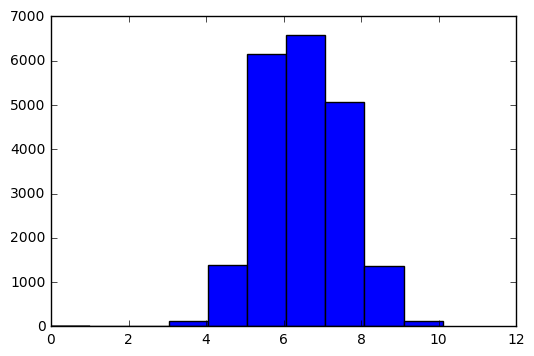

In [46]:
import numpy as np
arr = np.load("revenue_per_zip.npy")
# Ignore the zips with zero total revenue
arr = arr[arr>0]
print(arr.max())
print(arr.min())
print(arr.min())
print(np.std(arr))
print(arr.mean())
print(np.median(arr))

plt.hist(np.log10(arr))

### Question - what are the 5% and 95% percentiles of non-profits by revenue based on this data?

Now lets take a look at the two-dimensional array and looking at specific zip codes

In [111]:
import numpy as np
arr = np.load("zips_and_revenues.npy")
print(arr.shape)
print(arr)
arr = arr.T  # Transpose will set things up with more intuitive row/colums order
print(arr)

(2, 141419)
[[  19904   98248   37402 ...,   17325   32814   79550]
 [ 430457   31454 2830870 ...,  157595  185407  354345]]
[[  19904  430457]
 [  98248   31454]
 [  37402 2830870]
 ..., 
 [  17325  157595]
 [  32814  185407]
 [  79550  354345]]


In [113]:
print(arr[:, 0].max())
print(arr[:, 1].max())
# A couple of boolean array indexing examples:
arr[arr[:,1] == arr[:, 1].max()]
arr[arr[:,0] == 10003].sum()

99950
11117362273


562570686

### Question - in what zip codes are the top 0.01 percent of recipiences by revenue located?

### A possible answer:

In [85]:
top_zips = arr[arr[:, 1] > np.percentile(arr[:, 1], 99.99)]
print(top_zips)

[[      15219 10588819964]
 [      14850  4351368015]
 [       2138  6609236543]
 [      60637  3333076637]
 [      58122  3411016895]
 [      90048  3199591275]
 [      77024  4025714365]
 [      27701  3035099104]
 [      21211  5797614000]
 [       2145 11117362273]
 [      94305  3548514745]
 [      94304  6035405120]
 [      30322  3525925969]
 [      55413  3537547291]
 [      94107 10093618664]]
